<a href="https://colab.research.google.com/github/luisam19/course_optimizacion/blob/main/Taller4_LuisaMariaZapataSaldarriaga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='056938'> **Requerimientos iniciales -** </font> </font> <font color='8EC044'> **Instalación de librerias** </font>

In [1]:
!pip install -q pyomo
from pyomo.environ import *
from pyomo.opt import *
import os
# NEOS es un servicio de optimizacion en linea que vamos a usar
solver_manager = SolverManagerFactory('neos')
# An  email address is needed to setup of the NEOS service
os.environ['NEOS_EMAIL'] = 'luisa.zapatas@udea.edu.co'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import random as rand
rand.seed(10)
import matplotlib.pyplot as plt
import pyomo.environ as pyo
from pyomo.opt import SolverManagerFactory
import os

# <font color='056938'> **Problema**

Una compañía está interesada en ubicar sus servidores de atención en 35 sitios candidatos en la ciudad, para cada uno de estos sitios tiene la información de los costos de operación y de la cantidad de personas que podrían cubrir (véase el archivo adjunto). La única restricción que impone la compañía es que los sitios que se abran deben estar espaciados entre si como mínimo 2 km de distancia (es decir, entre dos sitios abiertos no puede haber menos de 2km). Para ello le suministraron la matriz de distancia correspondiente (también adjunta)

#</font> <font color='8EC044'> **Modelo no lineal** </font>

La compañía quiere maximizar la cantidad de personas cubiertas para un número fijo de instalaciones dado (en este caso 19). Formule y resuelva un modelo de optimización cuadrático  que le permita escoger óptimamente las 19 ubicaciones.

<font color='056938'> **Verbalización:**</font>

* **Para**: Maximizar la cantidad de personas cubiertas por las ubicaciones seleccionadas.

* **decidir**: Decidir qué ubicaciones seleccionar para maximizar la cantidad de personas cubiertas por esas ubicaciones.

* **Cumpliendo**:  las 19 ubicaciones


<font color='056938'> **Conjuntos** </font>

S={1,2 ,3,…35}


<font color='056938'> **Parámetros:** </font>

- $P_i$: Cantidad de personas que pueden ser cubiertas en el sitio $i$, donde $i$ está en el conjunto $S$.
- $d_{ij}$: Distancia entre los sitios $i$ y $j$, donde $i, j$ están en el conjunto $S$.

<font color='056938'>**Variables de decisión:** </font>

- $X_i$: Variable binaria que indica si se selecciona el sitio $i$, donde $i$ está en el conjunto $S$.

<font color='056938'>**Restricciones:** </font>

1. Seleccionar exactamente 19 ubicaciones:

$\sum_{i \in S} X_i = 19$

2. La distancia entre los sitios seleccionados debe ser al menos de 2 km:

$$d_{ij} \geq 2  X_i  X_j$$
donde $i, j$ están en el conjunto $S$ y $i \neq j$.

<font color='056938'>**Función Objetivo:** </font>

Maximizar la cantidad de personas cubiertas:

$$
\max \sum_{i \in S} P_i X_i
$$


In [8]:


# Ruta del archivo Excel
file_path = '/content/drive/MyDrive/Colab Notebooks/Maestria/Optimización/Taller04/DATOS.xlsx'

# Leer los datos desde el archivo Excel
cost_cover_df = pd.read_excel(file_path, sheet_name='cost_cover')
dist_matrix_df = pd.read_excel(file_path, sheet_name='dist_matrix')

# Convertir el costo de operación a un formato numérico
cost_cover_df['COSTO DE OPERACIÓN'] = cost_cover_df['COSTO DE OPERACIÓN'].replace('[\$,]', '', regex=True).astype(float)

# Extraer los datos relevantes
P = cost_cover_df['# VISITAS (ts)'].values

# Convertir la matriz de distancias a un formato numérico
dist_matrix_df = dist_matrix_df.drop('PUNTOS KAPTAR', axis=1)  # Eliminar la primera columna
dist_matrix = dist_matrix_df.values.astype(float)  # Convertir a tipo float

# Definir el modelo
model = pyo.ConcreteModel()

# Conjuntos
model.S = pyo.RangeSet(1, len(P))

# Parámetros
model.P = pyo.Param(model.S, initialize={i: P[i-1] for i in model.S})
model.d = pyo.Param(model.S, model.S, initialize={(i, j): dist_matrix[i-1][j-1] for i in model.S for j in model.S})

# Variables de decisión
model.X = pyo.Var(model.S, domain=pyo.Binary)

# Función objetivo
model.obj = pyo.Objective(expr=sum(model.P[i] * model.X[i] for i in model.S), sense=pyo.maximize)

# Restricciones
model.coverage_constraint = pyo.Constraint(expr=sum(model.X[i] for i in model.S) == 19)

def distance_constraint_rule(model, i, j):
    if i != j:
        return model.d[i, j] >= 2 * model.X[i] * model.X[j]
    return pyo.Constraint.Skip

model.distance_constraint = pyo.Constraint(model.S, model.S, rule=distance_constraint_rule)

# Configuración del solver con NEOS y CPLEX
solver_manager = SolverManagerFactory('neos')
os.environ['NEOS_EMAIL'] = 'luisa.zapatas@udea.edu.co'
results = solver_manager.solve(model, opt='cplex', tee=True)


X[2] = 1.0
X[5] = 1.0
X[7] = 1.0
X[10] = 1.0
X[11] = 1.0
X[14] = 1.0
X[16] = 1.0
X[17] = 1.0
X[19] = 1.0
X[20] = 1.0
X[21] = 1.0
X[23] = 1.0
X[24] = 1.0
X[25] = 1.0
X[26] = 1.0
X[27] = 1.0
X[28] = 1.0
X[30] = 1.0
X[33] = 1.0

Objetivo: 29783.0


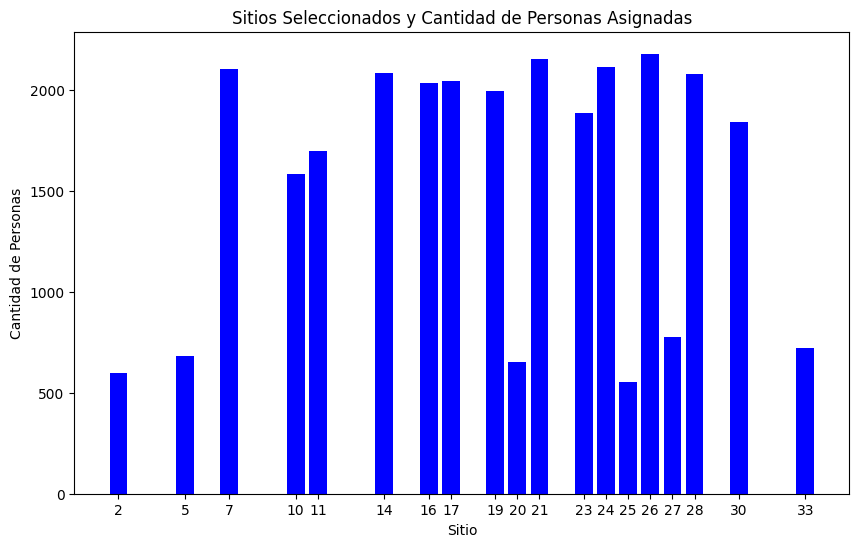

In [7]:
# Imprimir resultados
selected_sites = []
for i in model.S:
    if pyo.value(model.X[i]) > 0:
        selected_sites.append((i, pyo.value(model.P[i])))
        print(f"X[{i}] = {pyo.value(model.X[i])}")

print("\nObjetivo:", pyo.value(model.obj))

# Crear la gráfica
sites = [site[0] for site in selected_sites]
persons = [site[1] for site in selected_sites]

plt.figure(figsize=(10, 6))
plt.bar(sites, persons, color='blue')
plt.xlabel('Sitio')
plt.ylabel('Cantidad de Personas')
plt.title('Sitios Seleccionados y Cantidad de Personas Asignadas')
plt.xticks(sites)
plt.show()

En el gráfico previamente presentado se observan los 19 sitios seleccionados y su respectiva cantidad de personas asignadas, de aquí se deriva el valor resultante de la función objetivo que fue de 29783.0, es decir este valor corresponde al la máxima cantidad de personas cubiertas por las ubicaciones seleccionadas.

#</font> <font color='8EC044'> **Modelo Multiobjetivo** </font>

Luego, la compañía quiere analizar el trade-off entre el costo de operación y las personas cubiertas (ignorando la restricción de un número fijo de instalaciones). Implemente un método de optimización multiobjetivo que le permita a la compañía conocer dicho trade-off a través de un conjunto de soluciones no dominadas (para ello grafique la frontera eficiente Costo vs. Personas cubiertas que se obtiene e interprétela.  


<font color='056938'> **Verbalización** </font>

* **Para**: minimizar el costo total, que es la suma de los costos de establecer instalaciones en los sitios seleccionados.

* **decidir**: Encontrar un conjunto de soluciones no dominadas, lo que significa buscar soluciones que no sean peores en términos de costo y cobertura poblacional en comparación con otras soluciones

* **Cumpliendo**:  
  - Se impone una restricción de cobertura mínima que especifica que la suma de la población cubierta por los sitios seleccionados debe ser al menos igual a un valor 𝜖 ϵ dado.


<font color='056938'> **Conjuntos** </font>

S={1,2 ,3,…35}

<font color='056938'> **Parámetros** </font>

$d_{ij}$ :distancia entre el sitio i y el sitio j

$c_i$ :es el costo de operación del sitio i


<font color='056938'> **Variables de decisión** </font>

$X_i$ :Variable binaria que indica si se elige el sitio i ( 1:si se elige,0 en caso contrario)

$P_i$:Cantidad de personas que se cubrirían si se abre el sitio i

<font color='056938'> **Función multiobjetivo** </font>

$$
\text{max } P(x) = \sum_{i \in S} P_i X_i
$$
$$
\text{min } C(x) = \sum_{i \in S} c_i X_i
$$

<font color='056938'> **Sujeto a:** </font>
La distancia entre los sitios seleccionados debe ser al menos de 2 km:

$$d_{ij} \geq 2  X_i  X_j$$
donde $i, j$ están en el conjunto $S$ y $i \neq j$.

In [68]:
!pip install pyomo
!pip install highspy # Agregué un nuevo solver
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.3 MB/s eta 0:00:00


In [74]:
import numpy as np
import pandas as pd
from pyomo.environ import *
from pyomo.opt import SolverFactory, SolverManagerFactory
import os
import matplotlib.pyplot as plt

# Ruta del archivo Excel
file_path = '/content/drive/MyDrive/Colab Notebooks/Maestria/Optimización/Taller04/DATOS.xlsx'

# Leer los datos desde el archivo Excel
cost_cover_df = pd.read_excel(file_path, sheet_name='cost_cover')
dist_matrix_df = pd.read_excel(file_path, sheet_name='dist_matrix')

# Convertir el costo de operación a un formato numérico
cost_cover_df['COSTO DE OPERACIÓN'] = cost_cover_df['COSTO DE OPERACIÓN'].replace('[\$,]', '', regex=True).astype(float)

# Extraer los datos relevantes
P = cost_cover_df['# VISITAS (ts)'].values
C = cost_cover_df['COSTO DE OPERACIÓN'].values
dist_matrix = dist_matrix_df.values

n_sites = len(P)


In [ ]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils


In [80]:

def solve_epsilon_constraint(epsilon):
    model = ConcreteModel()

    # Conjuntos
    model.S = RangeSet(n_sites)

    # Parámetros
    model.P = Param(model.S, initialize=lambda model, i: P[i-1])
    model.C = Param(model.S, initialize=lambda model, i: C[i-1])
    model.d = Param(model.S, model.S, initialize=lambda model, i, j: dist_matrix[i-1][j-1])

    # Variables
    model.x = Var(model.S, domain=Binary)

    # Restricciones
    def distance_constraint_rule(model, i, j):
        if i < j and dist_matrix[i-1][j-1] < 2:
            return model.x[i] + model.x[j] <= 1
        return Constraint.Skip

    model.distance_constraint = Constraint(model.S, model.S, rule=distance_constraint_rule)

    # Restricción de cobertura mínima
    model.coverage_constraint = Constraint(expr=sum(model.P[i] * model.x[i] for i in model.S) >= epsilon)

    # Función objetivo: minimizar costo
    model.obj = Objective(expr=sum(model.C[i] * model.x[i] for i in model.S), sense=minimize)

    # Resolver el modelo

    solver_manager = SolverManagerFactory('neos')
    results = solver_manager.solve(model, opt='cplex', tee=True)


    if results.solver.termination_condition == TerminationCondition.optimal:
        # Obtener resultados
        selected_sites = [i for i in model.S if value(model.x[i]) > 0.5]
        people_covered = sum(value(model.P[i]) * value(model.x[i]) for i in model.S)
        cost = sum(value(model.C[i]) * value(model.x[i]) for i in model.S)
        return selected_sites, people_covered, cost
    else:
        print(f"Warning: Solver did not find an optimal solution for epsilon = {epsilon}")
        return None, None, None

# Probar con diferentes niveles de cobertura para el método \(\epsilon\)-constraint
coverage_levels = np.linspace(min(P), sum(P), 20)
results = [solve_epsilon_constraint(epsilon) for epsilon in coverage_levels]

# Filtrar resultados válidos
results = [result for result in results if result[0] is not None]



  - termination condition: infeasible
  - message from solver: CPLEX 22.1.1.0\x3a integer infeasible.; 26 MIP simplex iterations; 0 branch-and-bound nodes; No basis.


  - termination condition: infeasible
  - message from solver: CPLEX 22.1.1.0\x3a integer infeasible.; 0 MIP simplex iterations; 0 branch-and-bound nodes; No basis.


  - termination condition: infeasible
  - message from solver: CPLEX 22.1.1.0\x3a integer infeasible.; 0 MIP simplex iterations; 0 branch-and-bound nodes; No basis.


  - termination condition: infeasible
  - message from solver: CPLEX 22.1.1.0\x3a integer infeasible.; 0 MIP simplex iterations; 0 branch-and-bound nodes; No basis.


  - termination condition: infeasible
  - message from solver: CPLEX 22.1.1.0\x3a integer infeasible.; 0 MIP simplex iterations; 0 branch-and-bound nodes; No basis.


  - termination condition: infeasible
  - message from solver: CPLEX 22.1.1.0\x3a integer infeasible.; 0 MIP simplex iterations; 0 branch-and-bound nodes; No basis.


  - termination condition: infeasible
  - message from solver: CPLEX 22.1.1.0\x3a integer infeasible.; 0 MIP simplex iterations; 0 branch-and-bound nodes; No basis.


  - termination condition: infeasible
  - message from solver: CPLEX 22.1.1.0\x3a integer infeasible.; 0 MIP simplex iterations; 0 branch-and-bound nodes; No basis.


  - termination condition: infeasible
  - message from solver: CPLEX 22.1.1.0\x3a integer infeasible.; 0 MIP simplex iterations; 0 branch-and-bound nodes; No basis.


El modelo se prueba con diferentes niveles de cobertura (ϵ-constraint) variando el valor de 𝜖 a lo largo de un rango específico, los resultados obtenidos se ilustran en la siguiente curva de pareto.

La curva de Pareto ilustra el trade-off entre el **costo de operación** y la **cantidad de personas cubiertas**. Cada punto en la curva representa una solución donde no se puede mejorar un objetivo sin empeorar el otro. Esto permitirá a la compañía seleccionar una solución que balancee adecuadamente sus prioridades entre minimizar costos y maximizar cobertura.

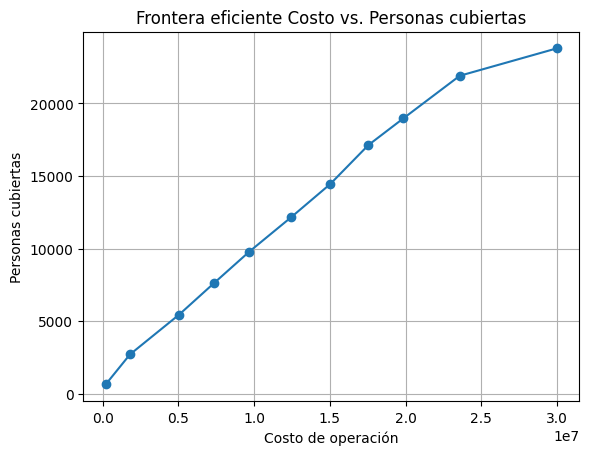

In [79]:
# Extraer y graficar los resultados
people_covered = [result[1] for result in results]
costs = [result[2] for result in results]

plt.figure()
plt.plot(costs, people_covered, marker='o')
plt.xlabel('Costo de operación')
plt.ylabel('Personas cubiertas')
plt.title('Frontera eficiente Costo vs. Personas cubiertas')
plt.grid(True)
plt.show()
